In [2]:
import numpy as np
import pandas as pd
import torch
import pickle
import matplotlib.pyplot as plt
from lpne.models import DcsfaNmf

MODEL_FILE = "/hpc/home/mk423/Anxiety/FullDataWork/Models/Final_mt_Model_500_epochs.pt"
DATA_PATH = "/work/mk423/SucroseCountdown/"
PROJECT_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Projections/"
FIGURE_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Figures/"

proj_file = "SucroseCD_projection.csv"
mean_file = "SucroseCD_mean_scores.csv"

model = torch.load(MODEL_FILE,map_location="cpu")
model.device="cpu"


FEATURE_LIST = ['X_power_1_2','X_coh_1_2','X_gc_1_2']
FEATURE_WEIGHT = [10,1,1]

import os, sys
umc_data_tools_path = "/hpc/home/mk423/Anxiety/Universal-Mouse-Code/"
sys.path.append(umc_data_tools_path)
import umc_data_tools as umc_dt

LPNE_PATH = "/work/mk423/lpne-data-analysis/"
sys.path.append(LPNE_PATH)
import data_tools

/hpc/home/mk423/.local/lib/python3.7/site-packages/lpne/pipelines/__init__.py:14: UserWarning: Could not load lpne/pipelines/default_params.yaml!
  warnings.warn("Could not load lpne/pipelines/default_params.yaml!")


In [8]:
X_psd, X_coh, X_gc, labels = data_tools.load_data("/work/mk423/Anxiety/rrow_data.mat",feature_list=["power","coherence","granger"])

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project


In [4]:
np.array(labels["windows"]["mouse"])=="Mouse04382"

array([ True,  True,  True, ..., False, False, False])

In [6]:
print(np.sum(np.logical_and(np.array(labels['windows']['expDate'])=='080420',np.array(labels["windows"]["mouse"])=="Mouse04382")))

5


In [13]:
X = np.hstack([X_psd*10,X_coh,X_gc])
s = model.project(X)
coeffs = model.classifier[0].weight[0].detach().cpu().numpy()
s_agg = s[:,:3]@coeffs

In [14]:
projectDict = {
    "mouse":labels['windows']['mouse'],
    "expDate":labels['windows']['expDate'],
    "time":labels['windows']['time'],
    "comp net": s_agg,
    "net 1": s[:,0],
    "net 2": s[:,1],
    "net 3": s[:,2],
    
}

df_all = pd.DataFrame.from_dict(projectDict)
df_all.head()
#df.to_csv(PROJECT_PATH + "rrow_10_mice_data_projection.csv")

,mouse,expDate,time,comp net,net 1,net 2,net 3
0,Mouse04382,080420,4,2.376952,0.066705,0.100906,0.056856
1,Mouse04382,080420,5,3.555675,0.110117,0.147589,0.022498
2,Mouse04382,080420,6,2.567417,0.062008,0.116191,0.031450
3,Mouse04382,080420,106,4.124127,0.111940,0.181260,0.007541
4,Mouse04382,080420,164,1.798570,0.075456,0.063346,0.004568


In [17]:
df.head()

,mouse,expDate,time,comp net,net 1,net 2,net 3
0,Mouse04382,080420,4,2.376952,0.066705,0.100906,0.056856
1,Mouse04382,080420,5,3.555675,0.110117,0.147589,0.022498
2,Mouse04382,080420,6,2.567417,0.062008,0.116191,0.031450
3,Mouse04382,080420,106,4.124127,0.111940,0.181260,0.007541
4,Mouse04382,080420,164,1.798570,0.075456,0.063346,0.004568


In [7]:
X_psd_od, X_coh_od, X_gc_od, labels_od = data_tools.load_data("/work/mk423/Anxiety/Mouse04382_080420_features.mat",feature_list=["power","coherence","granger"])

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project


In [9]:
X = np.hstack([X_psd_od*10,X_coh_od,X_gc_od])
s = model.project(X)
coeffs = model.classifier[0].weight[0].detach().cpu().numpy()
s_agg = s[:,:3]@coeffs

In [11]:
projectDict = {
    "mouse":labels_od['windows']['mouse'],
    "expDate":labels_od['windows']['expDate'],
    "time":labels_od['windows']['time'],
    "comp net": s_agg,
    "net 1": s[:,0],
    "net 2": s[:,1],
    "net 3": s[:,2],
    
}

df = pd.DataFrame.from_dict(projectDict)
df.to_csv(PROJECT_PATH + "rrow_mouse_04382_data_projection.csv")
df.head()

,mouse,expDate,time,comp net,net 1,net 2,net 3
0,Mouse04382,080420,1,1.105768,0.023795,0.051835,0.011656
1,Mouse04382,080420,2,1.985949,0.032589,0.099516,0.010292
2,Mouse04382,080420,3,0.979226,0.030151,0.039905,0.025627
3,Mouse04382,080420,4,1.390892,0.031592,0.064128,0.016879
4,Mouse04382,080420,5,3.973890,0.105922,0.174859,0.028858


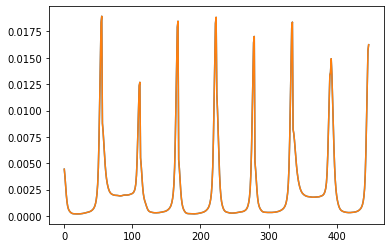

In [24]:
plt.plot(np.mean(X_psd_od,axis=0),label="single day")
plt.plot(np.mean(X_psd_m,axis=0),label="single mouse")

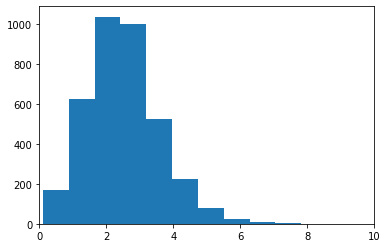

In [18]:
plt.hist(df["comp net"])
plt.xlim([0,10])
plt.show()

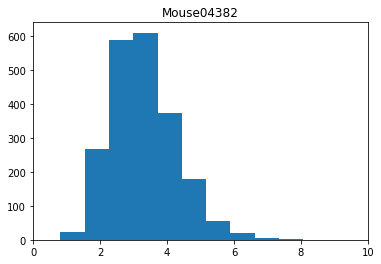

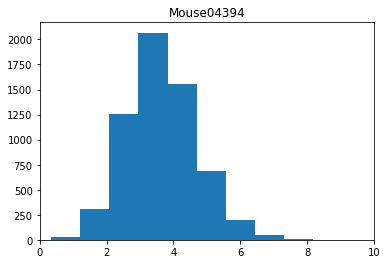

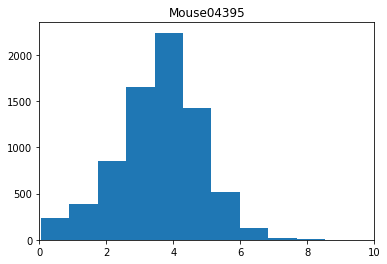

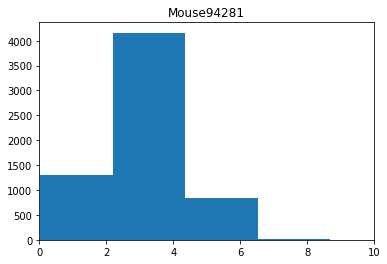

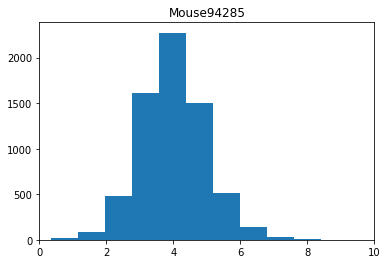

In [17]:
for mouse in np.unique(df_all["mouse"]):
    plt.hist(df_all[df_all["mouse"]==mouse]["comp net"])
    plt.title(mouse)
    plt.xlim([0,10])
    plt.show()